In [17]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [18]:
# importing the libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# importing shap
import shap

In [19]:
# import the dataset
df = pd.read_csv('/kaggle/input/wine-dataset/wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
# checking the dimensions of the dataframe
df.shape

(178, 14)

In [21]:
# checking for missing values
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [23]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

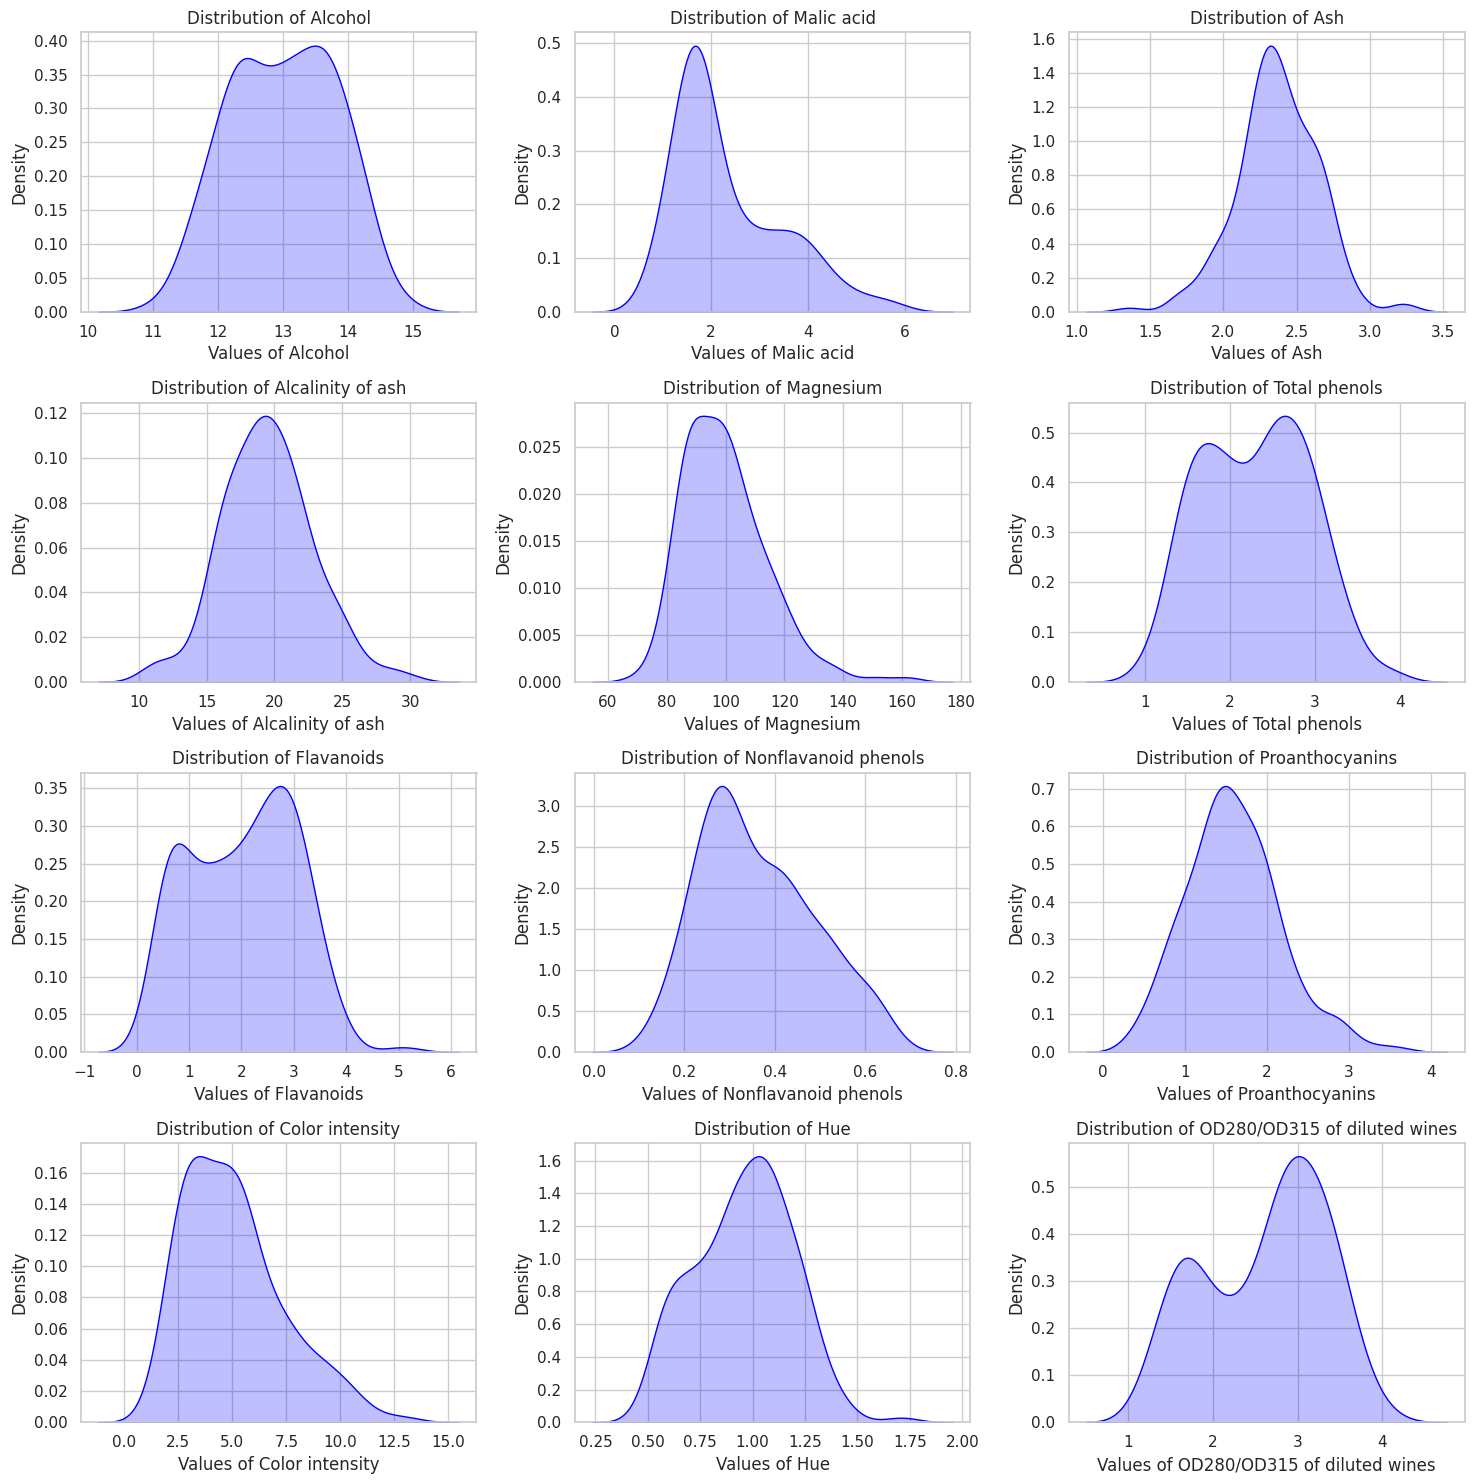

In [30]:
sns.set(style="whitegrid")

# List of variables to plot
variables_to_plot = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                     'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines']

# Remove extra space in column names
df.columns = df.columns.str.strip()

# Calculate the number of rows and columns for the subplot grid
num_variables = len(variables_to_plot)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)

# Create subplots with a dynamic grid and vertical spacing
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through variables and plot KDE on each subplot
for i, variable in enumerate(variables_to_plot):
    sns.kdeplot(df[variable], ax=axes[i], color='blue', fill=True, common_norm=False)
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(f'Values of {variable}')
    axes[i].set_ylabel('Density')

# Adjust layout for better spacing with vertical and horizontal spacing
plt.tight_layout(h_pad=1)

# Show the plot
plt.show()

# Model Building

In [32]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['Class'])
y = df['Class']

In [33]:
# diving the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [34]:
# building the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
# importing the necessary libraries
from sklearn.model_selection import GridSearchCV

# creating a dictionary and list of their values to optimize the model
params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
}

In [37]:
# intiating a grid search to find the most optimum parameters
grid_search = GridSearchCV(clf, params, cv=10)

In [38]:
# fitting the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

In [39]:
# obtaining the best model
clf = grid_search.best_estimator_

In [43]:
# Make predictions on the test set
y_pred = clf.predict(x_test)
# obtaining the classification report
from sklearn.metrics import classification_report

In [44]:
# Generate a classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Explainability via SHAP

In [46]:
# importing shap
import shap
# instantiating a TreeExplainer object
explainer = shap.TreeExplainer(clf)

In [47]:
# obtaining shapely values of the data
shap_values = explainer.shap_values(x)

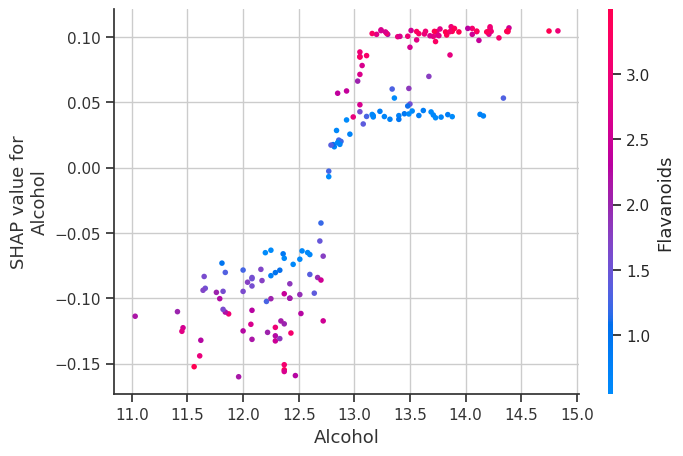

In [56]:
# plotting the dependence of shapely values on alcohol
shap.dependence_plot('Alcohol', shap_values[0], x)

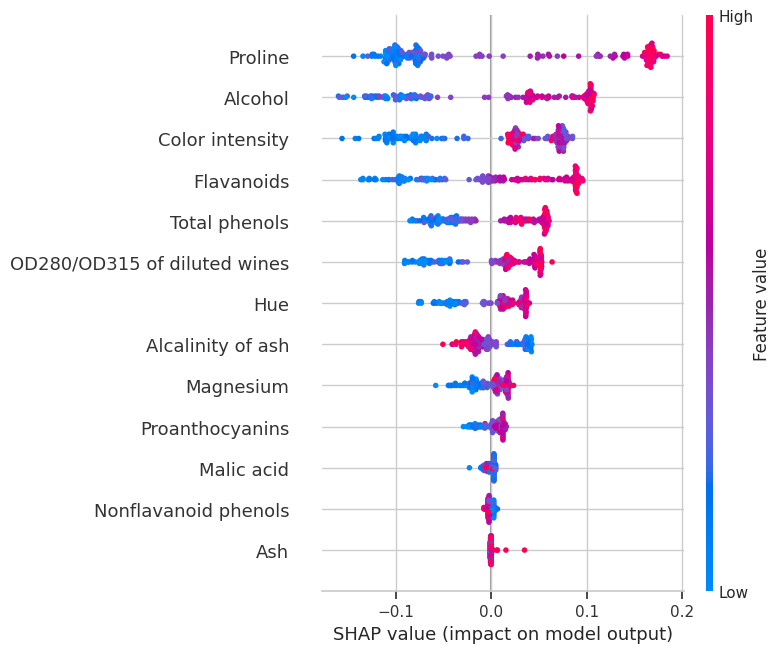

In [53]:
# plotting the dependence of shapely values on all the features
shap.summary_plot(shap_values[0], x)

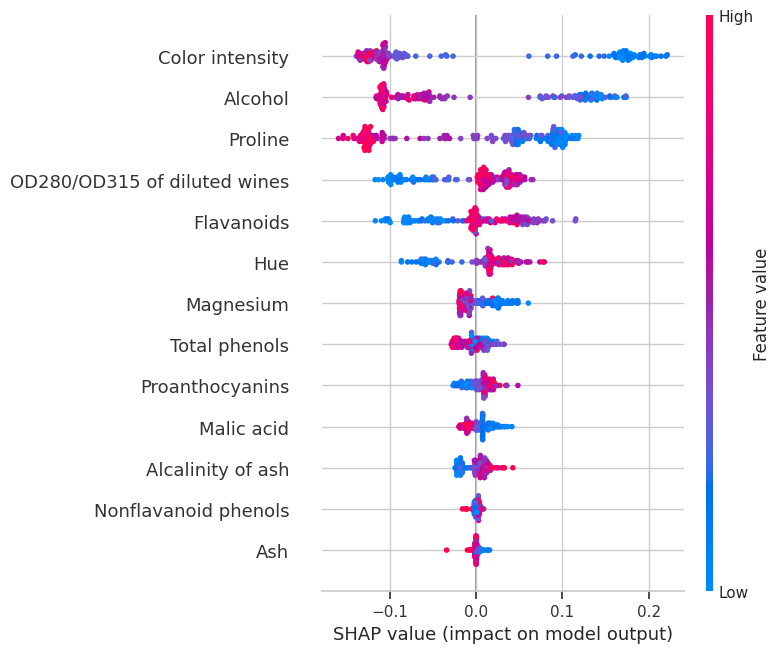

In [58]:
shap.summary_plot(shap_values[1], x)

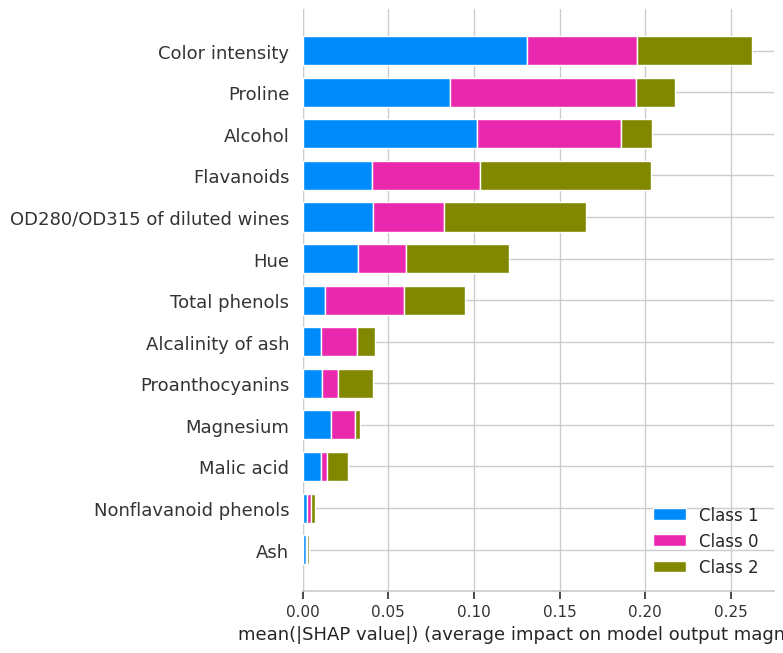

In [59]:
shap.summary_plot(shap_values, x_train, plot_type="bar")